In [30]:
from pathlib import Path
from mtpy import MTData, MTCollection
from mtpy.modeling import StructuredGrid3D
%matplotlib widget

In [34]:
cec_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\MIST\cec_edi_files\edited")
paces_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\MIST\PACE_EDIfiles\edited")
mist_path  = Path(r"c:\Users\jpeacock\OneDrive - DOI\MIST\2025_edi_files_processed")
other_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\MIST\other_edi_files")

In [35]:
cec_data = MTData()
cec_data.add_station(list(cec_path.glob("*.edi")), survey="cec")
cec_data.add_station(list(paces_path.glob("*.edi")), survey="paces")
cec_data.add_station(list(mist_path.glob("*.edi")), survey="mist")
cec_data.add_station(list(other_path.glob("*.edi")), survey="other")

25:11:20T12:34:36 | WARNING | line:244 |mt_metadata.timeseries.location | _assert_seconds | seconds should be 0 < > 60, currently 60 conversion will account for non-uniformtimne. Be sure to check accuracy.


25:11:20T12:34:59 | WARNING | line:163 |mtpy.imaging.plot_stations | plot | Could not add base map because HTTPSConnectionPool(host='basemap.nationalmap.gov', port=443): Max retries exceeded with url: /arcgis/rest/services/USGSTopo/MapServer/tile/9/204/89 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1010)')))


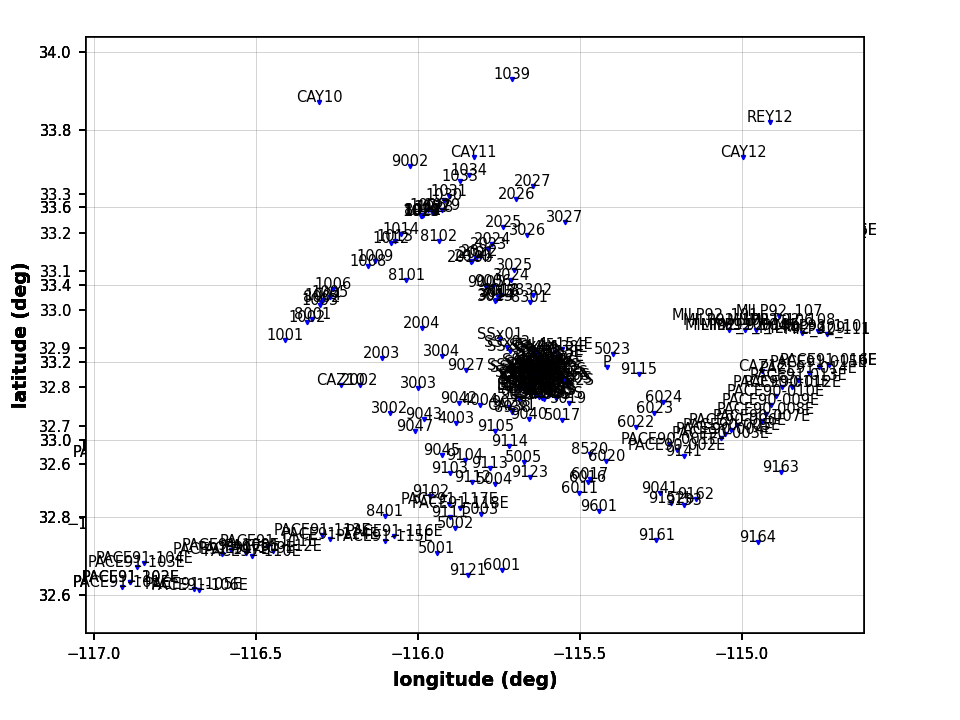

Plotting PlotStations

In [36]:
cec_data.plot_stations(fig_num=2)

In [37]:
inv_data = cec_data.apply_bounding_box(lon_min=-116.4, lon_max=-114.8, lat_min=32.5, lat_max=33.8)

25:11:20T12:35:10 | WARNING | line:163 |mtpy.imaging.plot_stations | plot | Could not add base map because HTTPSConnectionPool(host='basemap.nationalmap.gov', port=443): Max retries exceeded with url: /arcgis/rest/services/USGSTopo/MapServer/tile/9/204/90 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1010)')))


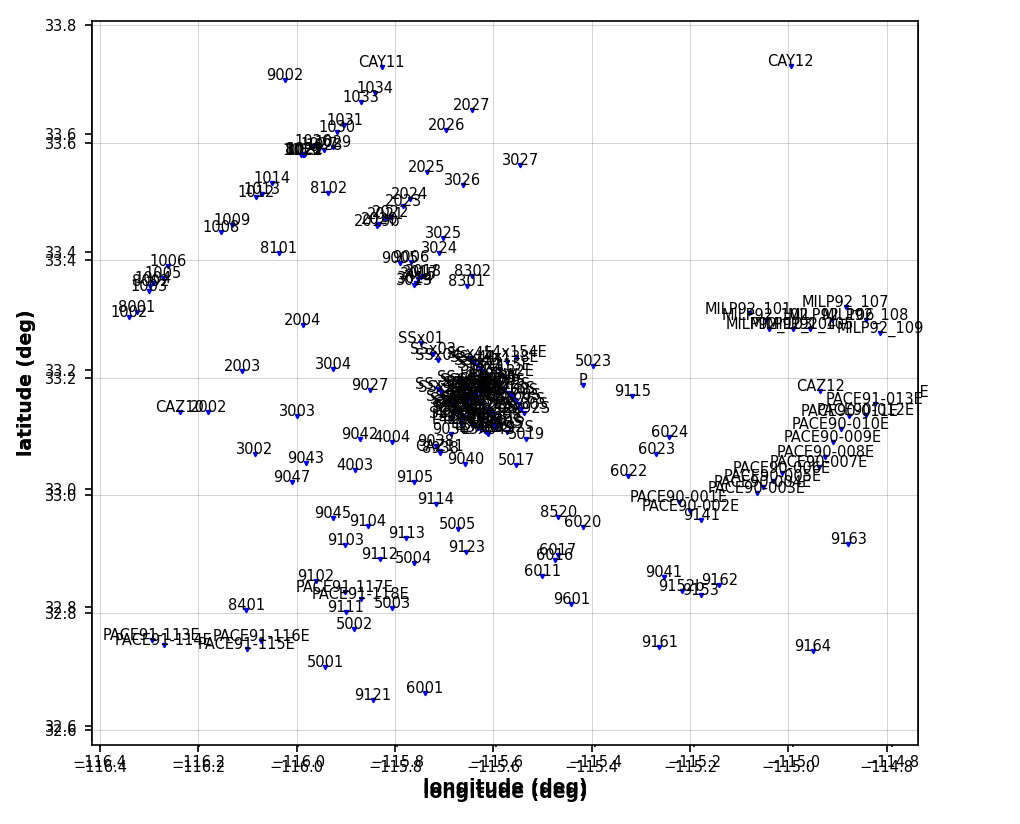

Plotting PlotStations

In [38]:
inv_data.plot_stations(fig_num=4)

In [40]:
with MTCollection() as mc:
    mc.open_collection(r"c:\Users\jpeacock\OneDrive - DOI\MIST\modem_inv\mist_phase2.h5")
    mc.from_mt_data(inv_data)
    mc.average_stations(1500)

25:11:20T12:39:08 | WARNING | line:1084 |mth5.mth5 | get_survey | /Experiment/Surveys/cec does not exist, check survey_list for existing names.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No metadata found for MasterStation, skipping from_dict.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No metadata found for Reports, skipping from_dict.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No metadata found for Filters, skipping from_dict.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No metadata found for Standards, skipping from_dict.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No metadata found for Station, skipping from_dict.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No metadata found for TransferFunctions, skipping from_dict.
25:11:20T12:39:08 | WARNING | line:253 |mth5.groups.base | read_metadata | No meta

TypeError: float() argument must be a string or a real number, not 'complex'

In [ ]:
.for fn in paces_path.glob("*.edi"):
    with open(fn, 'r') as fid:
        lines = fid.readlines()

    new_lines = []
    for line in lines:
        if line.startswith("LAT="):
            lat = line.split('=')[1].strip()
        elif line.startswith("LONG="):
            lon = line.split('=')[1].strip()
        
        if line.startswith("REFLAT="):
            line = f"{line.strip()}{lat}\n"
        elif line.startswith("REFLONG="):
            line = f"{line.strip()}{lon}\n"
        new_lines.append(line)

    with open(Path(r"c:\Users\jpeacock\OneDrive - DOI\MIST\PACE_EDIfiles\edited", fn.name), 'w') as fid:
        fid.write(''.join(new_lines))
        print(f"Updated file saved as {fn.name}")

Updated file saved as PACE90-001E.edi
Updated file saved as PACE90-002E.edi
Updated file saved as PACE90-003E.edi
Updated file saved as PACE90-004E.edi
Updated file saved as PACE90-005E.edi
Updated file saved as PACE90-006E.edi
Updated file saved as PACE90-007E.edi
Updated file saved as PACE90-008E.edi
Updated file saved as PACE90-009E.edi
Updated file saved as PACE90-010E.edi
Updated file saved as PACE90-011E.edi
Updated file saved as PACE90-012E.edi
Updated file saved as PACE91-013E.edi
Updated file saved as PACE91-014E.edi
Updated file saved as PACE91-015E.edi
Updated file saved as PACE91-016E.edi
Updated file saved as PACE91-101E.edi
Updated file saved as PACE91-102E.edi
Updated file saved as PACE91-103E.edi
Updated file saved as PACE91-104E.edi
Updated file saved as PACE91-105E.edi
Updated file saved as PACE91-106E.edi
Updated file saved as PACE91-107E.edi
Updated file saved as PACE91-108E.edi
Updated file saved as PACE91-109E.edi
Updated file saved as PACE91-110E.edi
Updated file